In [78]:
!pip install requests
!pip install bs4
!pip install matplotlib
!pip install seaborn
import re
import requests
import heapq
import numpy as np
import seaborn
from collections import OrderedDict
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [79]:
def get_content(article_name):
    url = f"https://en.wikipedia.org/wiki/{article_name}"
    request_to_info = requests.get(url)
    try:
        soup = BeautifulSoup(request_to_info.content, "html.parser")
        content_paragraph = soup.find(id='bodyContent').find_all('p')
        return content_paragraph
    except Exception as e:
        print(f"Error {e}")

In [80]:
def merge_contents(data):
    text1 = str()
    if content:
        for paragraph in content:
            text1 += paragraph.text
    return text1  

In [81]:
def tokenize(content):
    pattern = re.compile('[^a-zA-Z]')
    result_string = pattern.sub(' ', content)
    return result_string

In [82]:
def lower_collection(collection):
    return collection.lower()

In [83]:
def count_frequency(collection):
    return Counter(low_collection.split())

In [84]:
def print_most_frequent(frequencies, n):
    result = {}
    for i in frequencies.keys():
        result[i[keys()]] += i[values()]

In [85]:
def print_most_frequencies(frequencis, n):
    result = dict()
    list1 =  heapq.nlargest(n, frequencis.values())
    for i in frequencis.keys():
        if frequencis[i] in list1:
            result[i] = frequencis[i]    
    result = OrderedDict(sorted(result.items(), key=lambda item: item[1]))
    return result

In [109]:
stop_words = [ "the", "a", "of", "to", "in", "about", "on", "by", "as", "uv", "is", "s", "and", "at", "are", "for", "with", "it", "from", "this", "nm", "that", "these", "has", "which", "can", "cfcs", "o", "or", "an", "out", "most"]

In [110]:
def remove_stop_words(words, stop_words):
    for i in stop_words:
        if i in frequencies.keys():
            del frequencies[i]
    return frequencies

In [111]:
article_name = "Ozone_layer"
content = get_content(article_name)
merge_content = merge_contents(content)
collection = tokenize(merge_content)
low_collection = lower_collection(collection)
frequencies = count_frequency(low_collection)
filtered_collection = remove_stop_words(frequencies, stop_words)
result = print_most_frequencies(filtered_collection, 20)

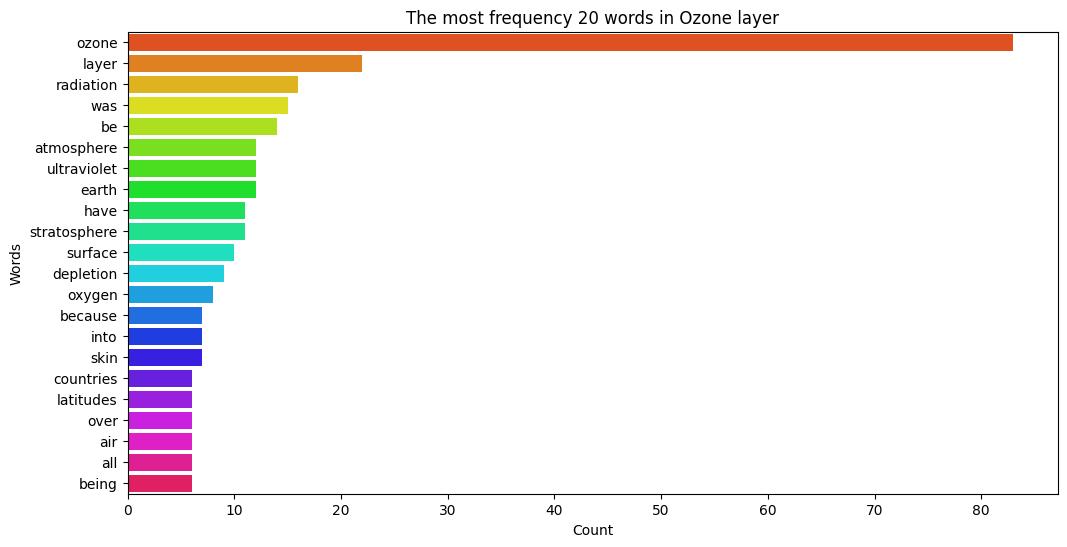

In [112]:
fig, ax = plt.subplots(figsize=(12,6))
x1 = np.flip(np.array([i for i in result.keys()]))
y2 = np.flip(np.array([i for i in result.values()]))

ax = seaborn.barplot(x=y2, y=x1, palette="hsv", legend=False)
plt.title(f"The most frequency 20 words in {' '.join(article_name.split('_'))}")
plt.xlabel("Count")
plt.ylabel("Words")
plt.show()
